In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("HTRU_2.csv",header=None)

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [7]:
lda = LDA()
lda.fit(X_train,y_train)
lda_y = lda.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, lda_y)
print(cm)
accuracy_score(y_test, lda_y)

[[4076   24]
 [  68  307]]


0.9794413407821229

In [9]:
temp_list = [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]
acc_lst = []
tpr_lst = []
thresh_lst = []
for thresh in temp_list:
    pred_prob = lda.predict_proba(X_test)
    pred_prob = (pred_prob[:,1]>=thresh).astype('int')
    cm = confusion_matrix(y_test, pred_prob)
    acc_lst.append(accuracy_score(y_test, pred_prob))
    tpr_lst.append(cm[1][1]/(cm[1][1]+cm[0][1]))
    thresh_lst.append(thresh)

In [10]:
lda = pd.DataFrame(
    {
        'Threshold':thresh_lst,
        'Accuracy':acc_lst,
        'Sensitivity':tpr_lst
    })

In [11]:
lda['Diff'] = lda['Accuracy'] - lda['Sensitivity']

In [12]:
import matplotlib.pyplot as plt

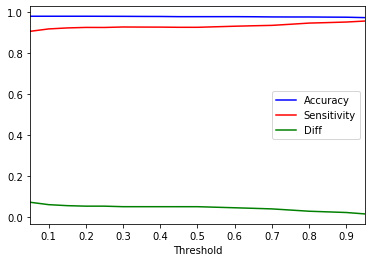

In [13]:
ax = plt.gca()
lda.plot(kind='line',x='Threshold',y='Accuracy',color='blue',ax=ax)
lda.plot(kind='line',x='Threshold',y='Sensitivity',color='red',ax=ax)
lda.plot(kind='line',x='Threshold',y='Diff',color='green',ax=ax)
plt.show()